# MOVIE RATING PREDICTION

![](cc.jpg)

Importing libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
movie_data = pd.read_csv("IMDb Movies India.csv", encoding="latin1")
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [19]:
movie_data.dropna(subset=['Duration','Genre', 'Year', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [20]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [21]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

In [16]:
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

In [17]:
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [23]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [24]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.1+ KB


In [25]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [26]:
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


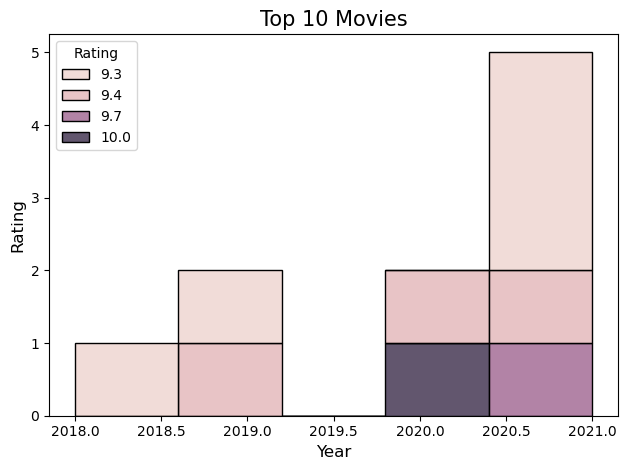

In [30]:
sns.histplot(data = top_movie, x= "Year", hue= "Rating", multiple="stack")
plt.title("Top 10 Movies", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


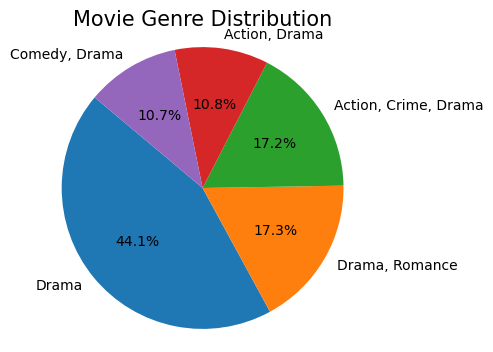

In [34]:
plt.figure(figsize=(4,4))
plt.pie(top_n_genres["Count"], labels=top_n_genres["Genre"], autopct="%1.1f%%", startangle=140)
plt.title("Movie Genre Distribution",fontsize=15)
plt.axis("equal")
plt.show()

In [35]:
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending = False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
274,Arvind Pratap,9.4
2309,Venkatesh Bk,9.3
1921,Sapna Bhavnani,9.3
2387,Vishwa Bhanu,9.3
1528,Rahul Mallick,9.3
635,Gautam Joshi,9.3


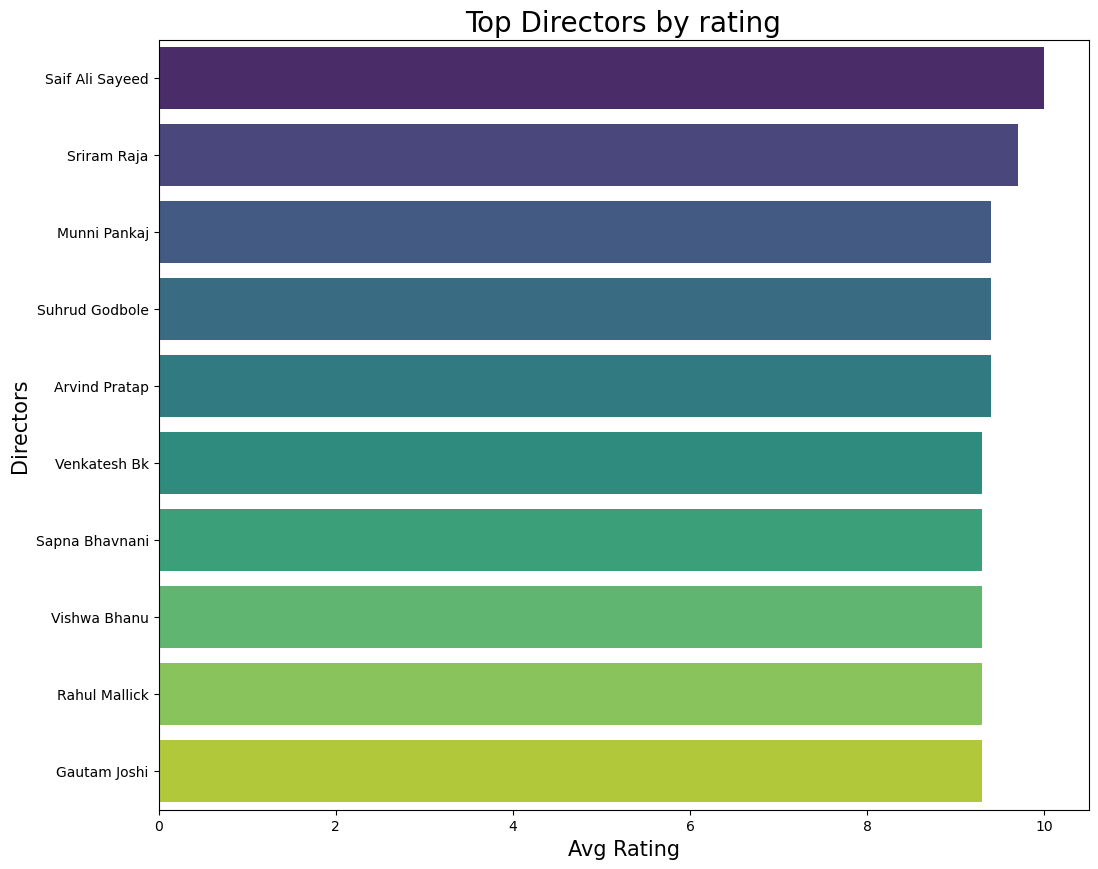

In [40]:
plt.figure(figsize=(12,10))
sns.barplot(data=top_directors, x='Rating', y= 'Director', palette= 'viridis')
plt.title('Top Directors by rating', fontsize=20)
plt.xlabel('Avg Rating', fontsize=15)
plt.ylabel('Directors', fontsize=15)
plt.show()

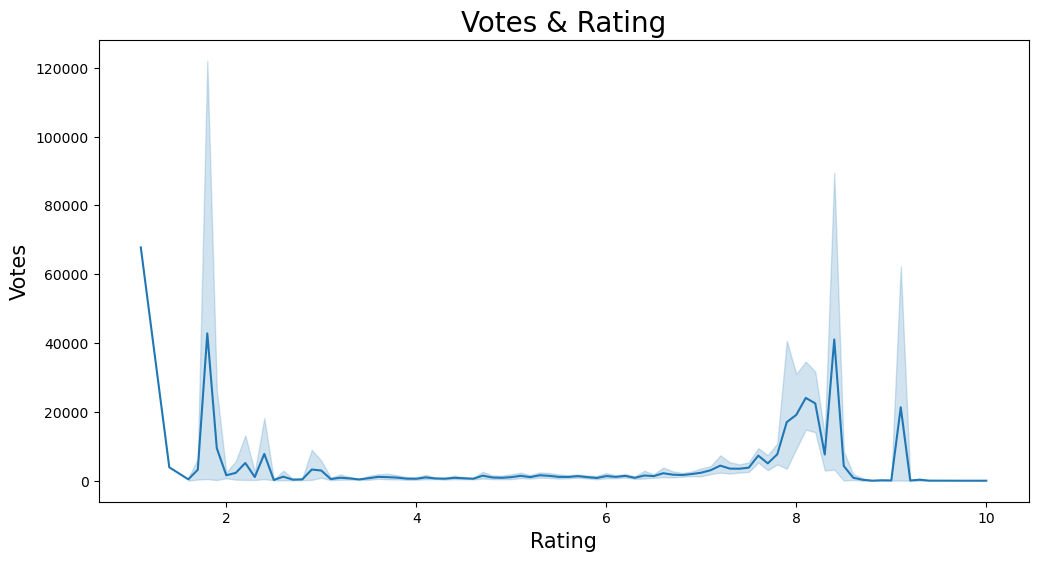

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movie_data, x='Rating', y= 'Votes')
plt.title('Votes & Rating', fontsize=20)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Votes', fontsize=15)
plt.show()

In [44]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
5,Akshay Kumar,82
6,Shashi Kapoor,81
7,Rajesh Khanna,74
8,Ajay Devgn,70
9,Sanjay Dutt,61


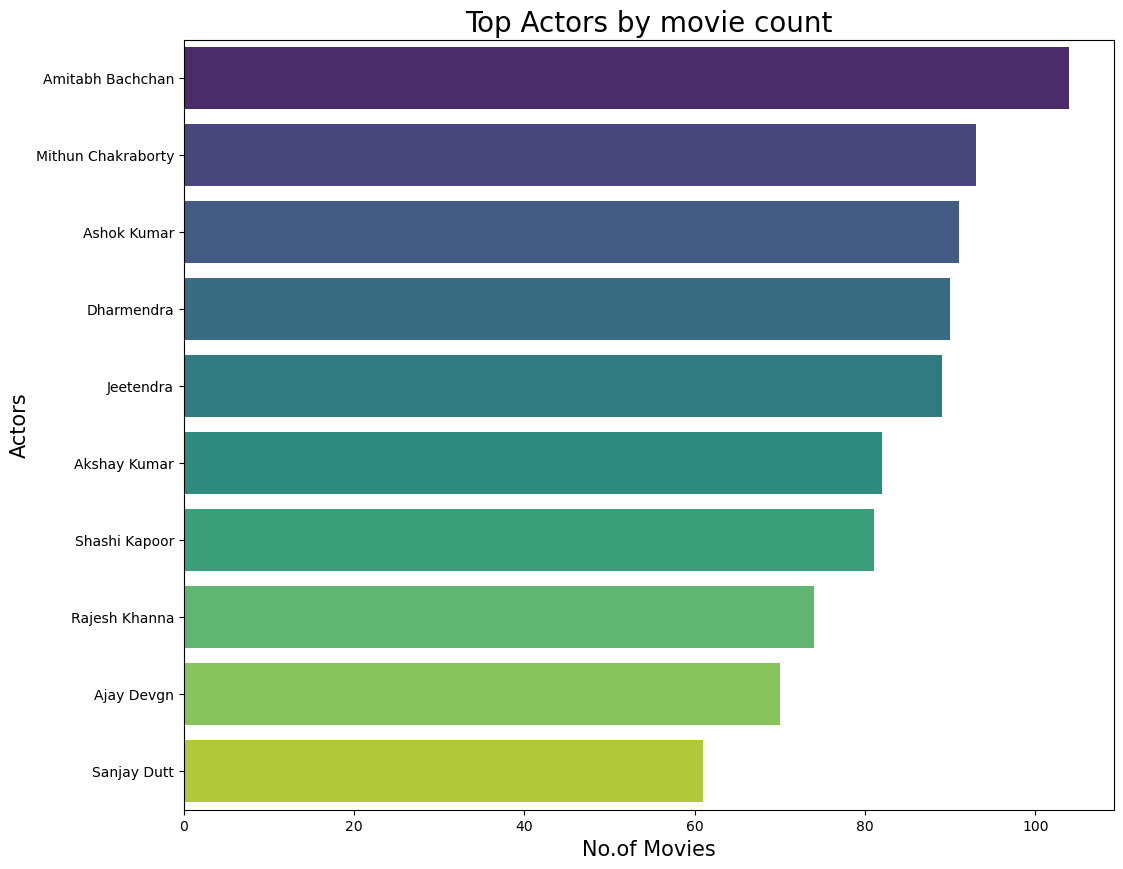

In [46]:
plt.figure(figsize=(12,10))
sns.barplot(data=top_n_actors, x='MovieCount', y= 'Actor', palette= 'viridis')
plt.title('Top Actors by movie count', fontsize=20)
plt.xlabel('No.of Movies', fontsize=15)
plt.ylabel('Actors', fontsize=15)
plt.show()

In [47]:
yearly_movie_counts = movie_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by="Year")
yearly_movie_counts

,Year,MovieCount
86,1931,2
90,1932,1
89,1933,1
88,1934,2
81,1935,5
...,...,...
1,2017,211
2,2018,202
0,2019,227
9,2020,140


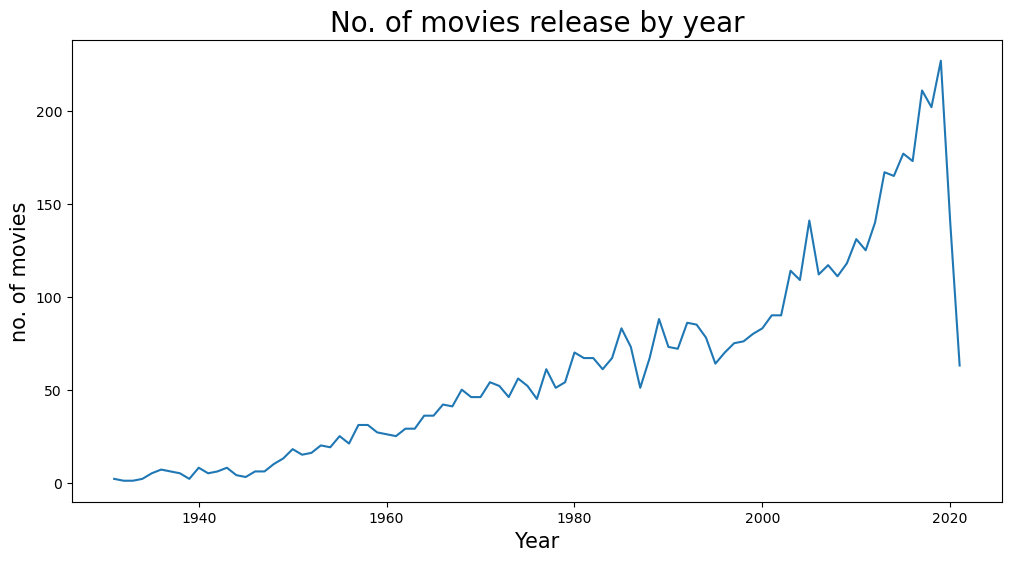

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_movie_counts, x='Year', y= 'MovieCount')
plt.title('No. of movies release by year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('no. of movies', fontsize=15)
plt.show()

In [50]:
filtered_df = movie_data[(movie_data['Rating']>0) & (movie_data['Votes']>10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
53,2 States,2014,149,"Comedy, Drama, Romance",6.9,24034,Abhishek Varman,Arjun Kapoor,Alia Bhatt,Amrita Singh
54,2.0,2018,148,"Action, Sci-Fi",6.2,21938,S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
376,Aamir,2008,99,"Action, Crime, Drama",7.7,10862,Raj Kumar Gupta,Rajeev Khandelwal,Aishwarya,Vasan Bala
410,Aankhen,2002,165,"Crime, Drama, Thriller",7.4,12574,Vipul Amrutlal Shah,Amitabh Bachchan,Akshay Kumar,Sushmita Sen
485,Aashiqui 2,2013,132,"Drama, Music, Musical",7.0,27357,Mohit Suri,Aditya Roy Kapoor,Shraddha Kapoor,Shaad Randhawa
657,Ae Dil Hai Mushkil,2016,158,"Drama, Music, Musical",5.8,21661,Karan Johar,Ranbir Kapoor,Aishwarya Rai Bachchan,Anushka Sharma
699,Agneepath,2012,174,"Action, Crime, Drama",6.9,22895,Karan Malhotra,Hrithik Roshan,Priyanka Chopra Jonas,Sanjay Dutt
732,Airlift,2016,130,"Drama, History",8.0,53897,Raja Menon,Akshay Kumar,Nimrat Kaur,Kumud Mishra


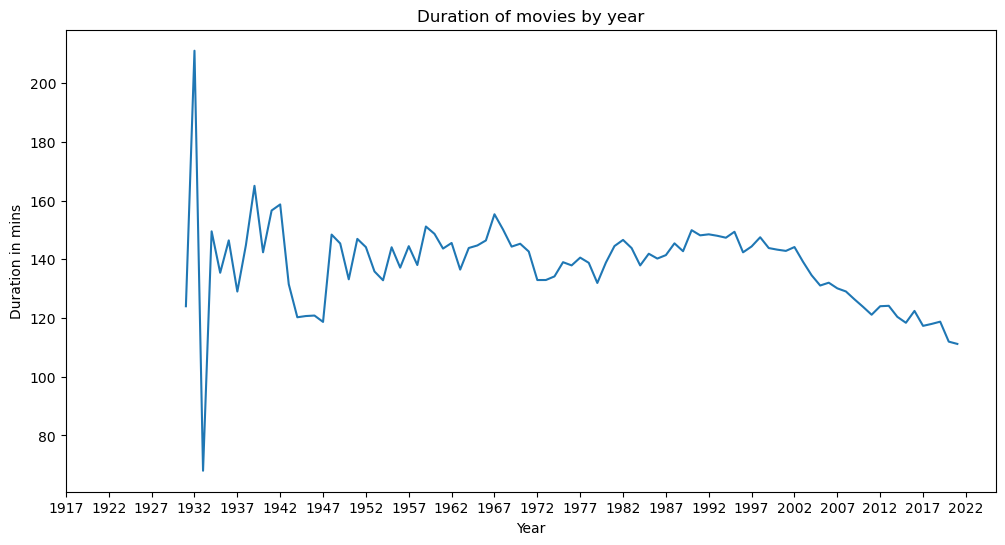

In [54]:
movie_data['Duration'] = movie_data['Duration'].astype(int)
movie_data['Year'] = movie_data['Year'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(data=movie_data, x='Year', y='Duration', errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in mins')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))

plt.show()

In [55]:
movie_data['Genre']= movie_data['Genre'].str.split(',')

genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


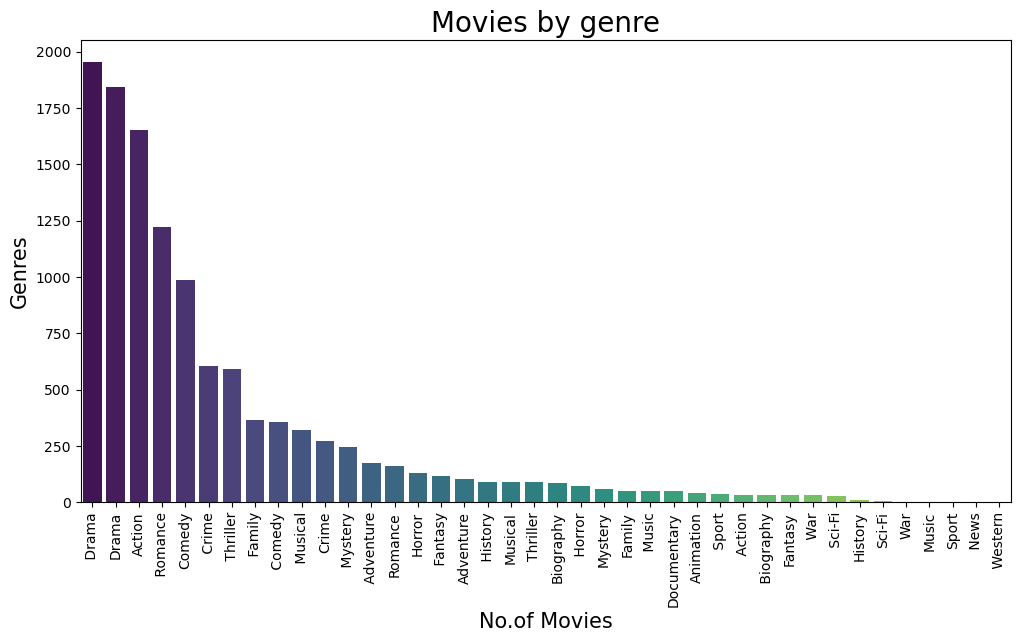

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette= 'viridis')
plt.title('Movies by genre', fontsize=20)
plt.xlabel('No.of Movies', fontsize=15)
plt.ylabel('Genres', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = movie_data.drop(['Name'], axis=1)
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])
trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ','.join(x)))
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.977778,0.293333,0.610667,0.662921,0.000005,0.258848,0.690148,0.979310,0.124853
1,0.977778,0.296667,0.490667,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
2,0.733333,0.420000,0.418667,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391
3,0.822222,0.403333,0.770667,0.707865,0.001828,0.841152,0.353241,0.479310,0.987867
4,0.900000,0.203333,0.853333,0.505618,0.000543,0.055556,0.987238,0.506466,0.396477


In [61]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.142563
Genre       0.121796
Actor 3     0.042413
Actor 2     0.041353
Actor 1     0.023430
Duration    0.001839
Director   -0.006824
Year       -0.204642
Name: Rating, dtype: float64

<Axes: >

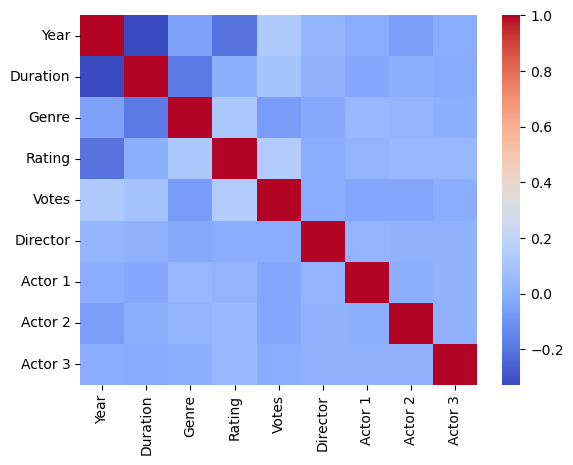

In [62]:
sns.heatmap(corr_df, annot=False, cmap="coolwarm")

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
X =trans_data.drop(['Rating'], axis=1)

In [67]:
y = trans_data['Rating']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [69]:
X_test = np.array(X_test)

In [70]:
y_pred = model.predict(X_test)
y_pred

array([5.63033377, 5.84119076, 5.93058305, ..., 5.60661345, 5.62132497,
       6.54181763])

In [71]:
print('R2 score: ', r2_score(y_test,y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

R2 score:  0.08929055052181312
Mean absolute error:  1.0495625054893811
Mean squared error:  1.6864004365428569


In [72]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
13713    6.7
2820     6.8
1810     4.8
13679    6.7
1649     6.6
Name: Rating, Length: 1132, dtype: float64
